In [1]:
### Arbol de Decision
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [2]:
X,y=make_classification(n_samples=1000)

In [6]:
pd.DataFrame(X).shape

(1000, 20)

In [7]:
from sklearn.model_selection import train_test_split 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1234)

In [37]:
Arbol=DecisionTreeClassifier(max_depth=4,random_state=1234)

In [38]:
Arbol.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1234)

In [39]:
y_pred=Arbol.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix

In [41]:
confusion_matrix(y_test,y_pred)

array([[138,  19],
       [ 15, 128]], dtype=int64)

In [42]:
accuracy_score(y_test,y_pred)

0.8866666666666667

In [43]:
recall_score(y_test,y_pred)

0.8951048951048951

In [44]:
precision_score(y_test,y_pred)

0.8707482993197279

In [45]:
dict(zip(pd.DataFrame(X_train), Arbol.feature_importances_))

{0: 0.0,
 1: 0.0,
 2: 0.11079073511702177,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.015207212484457866,
 9: 0.13374184795095434,
 10: 0.7164991262657155,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.01596331477223919,
 16: 0.007797763409611396,
 17: 0.0,
 18: 0.0,
 19: 0.0}

In [46]:
from sklearn.tree import export_graphviz

In [48]:
export_graphviz(Arbol,filled=True)

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="X[10] <= 0.087\\ngini = 0.5\\nsamples = 700\\nvalue = [345, 355]", fillcolor="#f9fcfe"] ;\n1 [label="X[9] <= -0.634\\ngini = 0.305\\nsamples = 367\\nvalue = [298, 69]", fillcolor="#eb9e67"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[8] <= 2.88\\ngini = 0.118\\nsamples = 239\\nvalue = [224, 15]", fillcolor="#e78946"] ;\n1 -> 2 ;\n3 [label="X[16] <= 2.717\\ngini = 0.111\\nsamples = 238\\nvalue = [224, 14]", fillcolor="#e78945"] ;\n2 -> 3 ;\n4 [label="gini = 0.104\\nsamples = 237\\nvalue = [224, 13]", fillcolor="#e78844"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]", fillcolor="#399de5"] ;\n3 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]", fillcolor="#399de5"] ;\n2 -> 6 ;\n7 [label="X[2] <= 0.264\\ngini = 0.488\\nsamples = 128\\nvalue = [74, 54]", fillcolor="#f8ddc9"] ;\n1 -> 7 ;\n8 [label="

In [49]:
from sklearn.tree import plot_tree

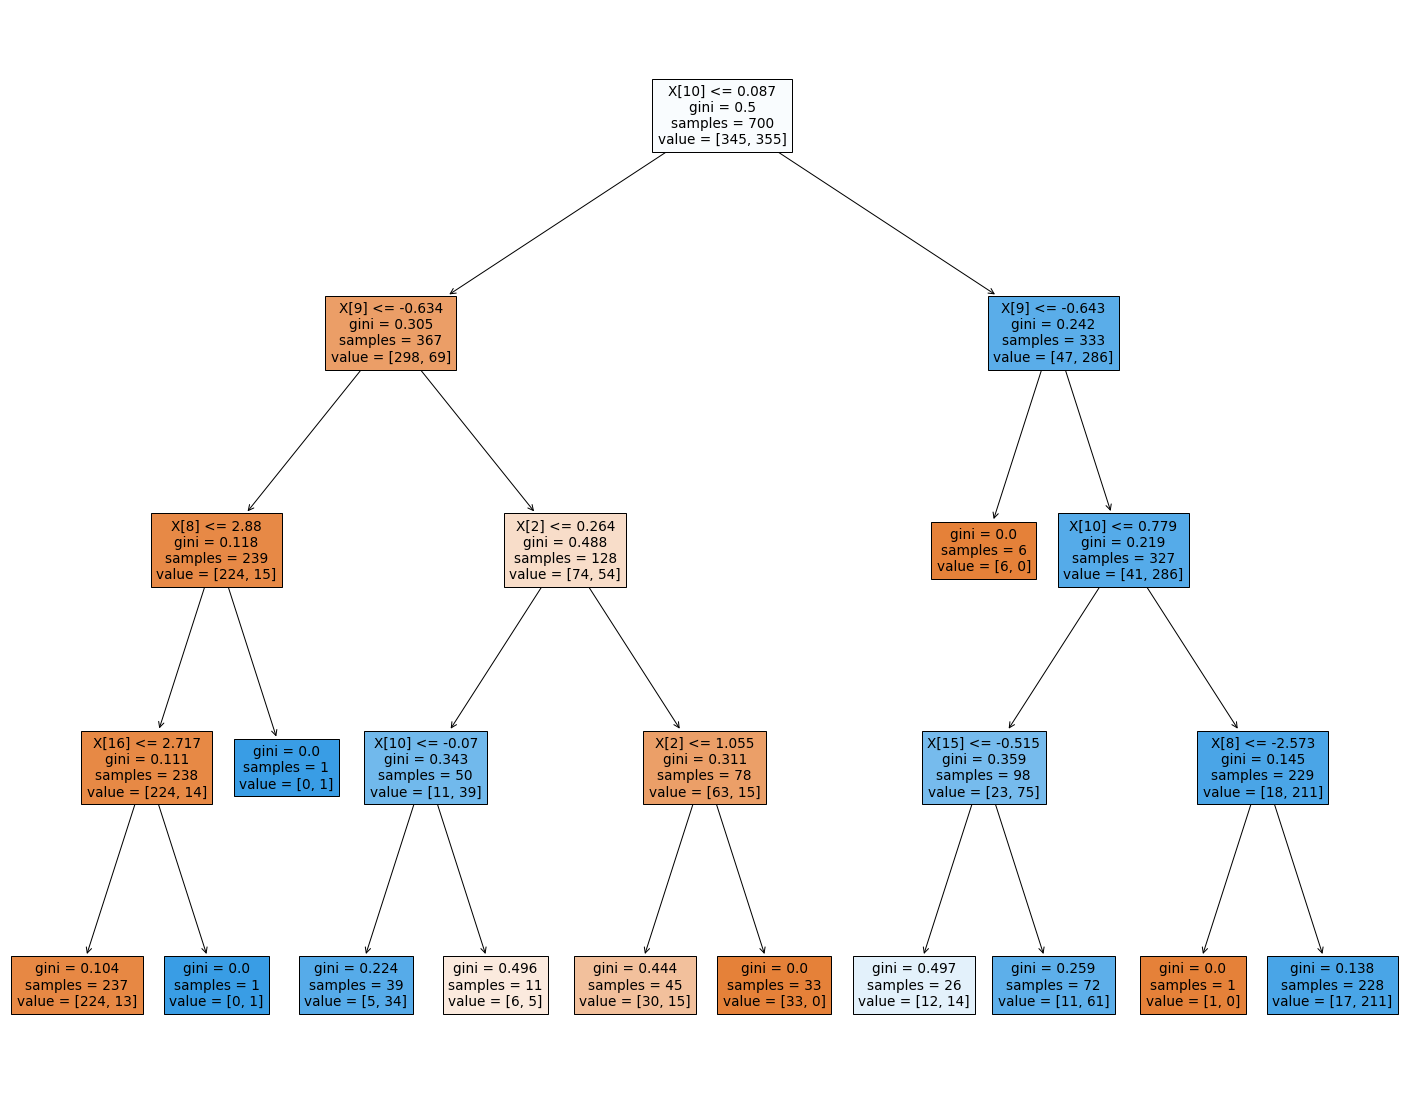

In [52]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,20))

plot_tree(Arbol,filled=True);